In [48]:
#!conda install -c conda-forge numpy scikit-learn optuna seaborn matplotlib -y

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

# Import Scikit-Learn library for decision tree models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

# Note - you will need version 0.24.1 of scikit-learn to load this library (SequentialFeatureSelector)
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# Another statistic model library
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

import scipy.stats as stats
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d

import math

# hyperparameter optimization
#import optuna
#import sklearn.model_selection
#import sklearn.preprocessing

In [72]:
data = pd.read_csv('datasets/TTS_data.csv')
len(data)

/home/tessmachado/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2,3,13,28,29,30,31,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


617580

In [73]:
data.columns

Index(['Unnamed: 0', 'dataProvider1', 'dataProvider2', 'program1ProjectID',
       'PTODate_orProxy_', 'systemSizeInDCSTC_KW_', 'totalInstalledCost___',
       'Up_FrontCashIncentive___', 'customerSegment', 'is_expansion',
       'is_multiphase', 'tracking_Y_N_', 'ground_mounted_Y_N_',
       'hostCustomerZip__4_', 'hostCustomerCity', 'state',
       'city_state_country', 'latitude', 'longitude',
       'utilityServiceTerritory', 'x3rdPartyOwned_1_0_', 'installer_clean',
       'self_install_Y_N_', 'azimuth_1', 'tilt_1', 'mod_manuf1_clean',
       'mod_model1_clean', 'moduleQty_1', 'mod_manuf2_clean',
       'mod_model2_clean', 'mod_manuf3_clean', 'mod_model3_clean',
       'additionalModuleModels_Y_N_', 'mod_tech1', 'mod_tech2', 'mod_tech3',
       'mod_BIPV1', 'mod_bifacial1', 'mod_nameplate_capacity1',
       'mod_efficiency1', 'inv_manuf1_clean', 'inv_model1_clean',
       'inverterQuantity_1', 'additionalInverterModels_Y_N_', 'inv_microinv1',
       'inv_battery_hybrid1', 'inv_bui

In [67]:
# create new column: installation cost per module
# create new df with relevant columns for calculation
data2 = data[['totalInstalledCost___', 'TotalModuleQty']]
vals = [] # initialize empty list

for i in range(len(data2)):
    # avoid dividing by zero and -1 (no data)
    if (data2['TotalModuleQty'][i] != 0) or (data2['TotalModuleQty'][i] != -1) or (data2['totalInstalledCost___'][i] != 0) or (data2['totalInstalledCost___'][i] != -1):
        vals.append(-1)
    else:
        vals.append(data2['totalInstalledCost___'][i]/data2['TotalModuleQty'][i])
            
data2.insert(loc = 2, column='cost_per_module', value = vals) # creates new column
data['cost_per_module'] = data2['cost_per_module'] # creates column to primary dataset
data.head()

,Unnamed: 0,dataProvider1,dataProvider2,program1ProjectID,PTODate_orProxy_,systemSizeInDCSTC_KW_,totalInstalledCost___,Up_FrontCashIncentive___,customerSegment,is_expansion,...,inverterQuantity_1,additionalInverterModels_Y_N_,inv_microinv1,inv_battery_hybrid1,inv_builtin_meter1,inv_outputcapacity1,dc_optimizer,ILR,TotalModuleQty,cost_per_module
0,0,Arizona Public Service,-1,3,24-Jan-00,12.025,-1.0,-1.0,RES,0,...,-1.0,-1,1,0,0,0.240,0,-1.0,-1.0,-1
1,1,Arizona Public Service,-1,5,6-Mar-00,8.640,-1.0,-1.0,RES,0,...,-1.0,-1,0,0,1,7.616,1,-1.0,-1.0,-1
2,2,Arizona Public Service,-1,8,7-May-02,2.400,-1.0,-1.0,RES,0,...,-1.0,-1,0,-1,1,15.160,0,-1.0,-1.0,-1
3,3,Arizona Public Service,-1,10,17-Dec-02,2.160,-1.0,-1.0,RES,0,...,-1.0,-1,0,-1,1,15.160,0,-1.0,-1.0,-1
4,4,Arizona Public Service,-1,11,19-Dec-02,2.520,-1.0,-1.0,RES,0,...,-1.0,-1,0,-1,1,15.160,0,-1.0,-1.0,-1


In [74]:
df = data.where(data['totalInstalledCost___'] != -1).dropna()
#data.dropna(subset=['totalInstalledCost___'])
len(df)

492343

# Heatmaps

<AxesSubplot:>

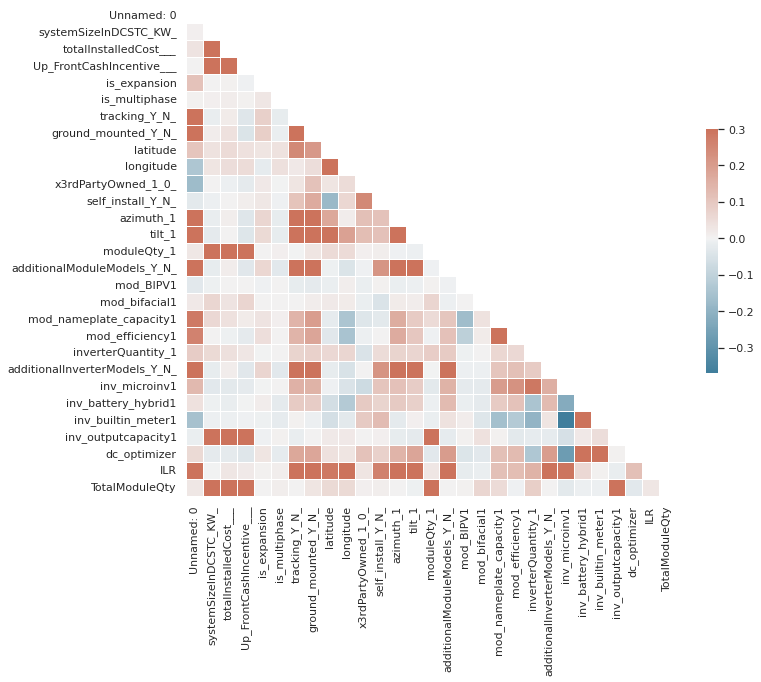

In [75]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<AxesSubplot:>

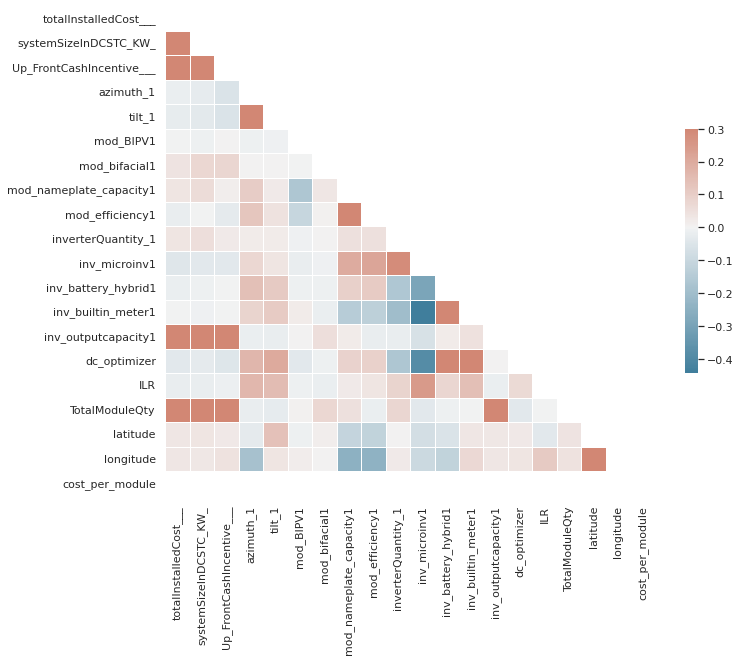

In [70]:
from string import ascii_letters

df1 = df[['totalInstalledCost___', 'systemSizeInDCSTC_KW_', 'Up_FrontCashIncentive___', 'azimuth_1', 'tilt_1', 'mod_BIPV1', 
        'mod_bifacial1', 'mod_nameplate_capacity1', 'mod_efficiency1', 'inverterQuantity_1', 
        'inv_microinv1', 'inv_battery_hybrid1', 'inv_builtin_meter1', 'inv_outputcapacity1', 
        'dc_optimizer', 'ILR', 'TotalModuleQty', 'latitude', 'longitude', 'cost_per_module']]
df1 = df1.dropna(subset=['latitude', 'longitude'])

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

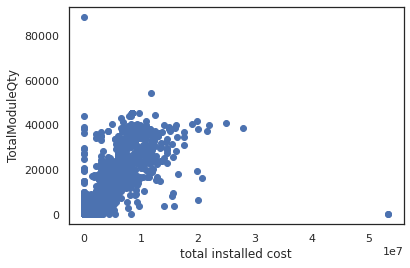

In [8]:
df1 = df1.where(df1['TotalModuleQty'] != -1).dropna()
plt.scatter(df1['totalInstalledCost___'], df1['TotalModuleQty'])
plt.xlabel('total installed cost')
plt.ylabel('TotalModuleQty')
plt.show()

# Stepwise Selection

In [37]:
X = df[['systemSizeInDCSTC_KW_', 'Up_FrontCashIncentive___', 'azimuth_1', 'tilt_1', 
        'mod_nameplate_capacity1', 'inverterQuantity_1', 'inv_outputcapacity1', 
        'ILR', 'TotalModuleQty', 'latitude', 'longitude','mod_efficiency1']]

y = df['totalInstalledCost___']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=9, shuffle = True)

In [38]:
names = 'systemSizeInDCSTC_KW_', 'Up_FrontCashIncentive___', 'azimuth_1', 'tilt_1', 'mod_nameplate_capacity1', 'inverterQuantity_1', 'inv_outputcapacity1', 'ILR', 'TotalModuleQty', 'latitude', 'longitude','mod_efficiency1'
f_names = np.array(names)

In [39]:
# Forward stepwise selection
sfs_forward = SequentialFeatureSelector(linear_model.LinearRegression(), 
                                        n_features_to_select=5, 
                                        direction = 'forward').fit(X,y)
print('support: ', sfs_forward.get_support(), "\n")
selected = sfs_forward.get_support(indices = True)
print(selected)
print('Selected input features using Forward Stepwise Selection: \n', f_names[selected])
fsc = f_names[selected]

support:  [ True False False False  True False False False  True  True False  True] 

[ 0  4  8  9 11]
Selected input features using Forward Stepwise Selection: 
 ['systemSizeInDCSTC_KW_' 'mod_nameplate_capacity1' 'TotalModuleQty'
 'latitude' 'mod_efficiency1']


In [40]:
sfs_backward = SequentialFeatureSelector(linear_model.LinearRegression(), 
                                        n_features_to_select=5, 
                                        direction = 'backward').fit(X,y)

print('support: ', sfs_backward.get_support(), "\n")
selected = sfs_backward.get_support(indices = True)
print(selected)
print('Selected input features using Backward Stepwise Selection: \n', f_names[selected])
bsc = f_names[selected]

support:  [ True False False False  True False False  True  True False False  True] 

[ 0  4  7  8 11]
Selected input features using Backward Stepwise Selection: 
 ['systemSizeInDCSTC_KW_' 'mod_nameplate_capacity1' 'ILR' 'TotalModuleQty'
 'mod_efficiency1']


In [41]:
# stepwise for efficiency
X = df[['systemSizeInDCSTC_KW_', 'Up_FrontCashIncentive___', 'azimuth_1', 'tilt_1', 
        'mod_nameplate_capacity1', 'inverterQuantity_1', 'inv_outputcapacity1', 
        'ILR', 'TotalModuleQty', 'latitude', 'longitude','totalInstalledCost___']]

y = df['mod_efficiency1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=9, shuffle = True)

In [42]:
names = 'systemSizeInDCSTC_KW_', 'Up_FrontCashIncentive___', 'azimuth_1', 'tilt_1', 'mod_nameplate_capacity1', 'inverterQuantity_1', 'inv_outputcapacity1', 'ILR', 'TotalModuleQty', 'latitude', 'longitude','totalInstalledCost___'
f_names = np.array(names)

In [43]:
# Forward stepwise selection
sfs_forward = SequentialFeatureSelector(linear_model.LinearRegression(), 
                                        n_features_to_select=5, 
                                        direction = 'forward').fit(X,y)
print('support: ', sfs_forward.get_support(), "\n")
selected = sfs_forward.get_support(indices = True)
print(selected)
print('Selected input features using Forward Stepwise Selection: \n', f_names[selected])
fse = f_names[selected]

support:  [ True False False False  True  True False False  True False False  True] 

[ 0  4  5  8 11]
Selected input features using Forward Stepwise Selection: 
 ['systemSizeInDCSTC_KW_' 'mod_nameplate_capacity1' 'inverterQuantity_1'
 'TotalModuleQty' 'totalInstalledCost___']


In [44]:
sfs_backward = SequentialFeatureSelector(linear_model.LinearRegression(), 
                                        n_features_to_select=5, 
                                        direction = 'backward').fit(X,y)

print('support: ', sfs_backward.get_support(), "\n")
selected = sfs_backward.get_support(indices = True)
print(selected)
print('Selected input features using Backward Stepwise Selection: \n', f_names[selected])
bse = f_names[selected]

support:  [ True False False False  True  True False  True False False False  True] 

[ 0  4  5  7 11]
Selected input features using Backward Stepwise Selection: 
 ['systemSizeInDCSTC_KW_' 'mod_nameplate_capacity1' 'inverterQuantity_1'
 'ILR' 'totalInstalledCost___']


In [36]:
print(fsc)
print(bsc)
print(fse)
print(bse)

NameError: name 'fsc' is not defined

In [84]:
def difference(list1, list2):
    return list(set(list1).symmetric_difference(set(list2)))

print(difference(fsc, bsc))
print(difference(fse, bse))

[]
[]
[]
[]
['latitude', 'ILR']
['latitude', 'ILR']
['TotalModuleQty', 'ILR']
['TotalModuleQty', 'ILR']


# Regressors

df_reg = df[['systemSizeInDCSTC_KW_', 'Up_FrontCashIncentive___', 'azimuth_1', 'tilt_1', 
        'mod_nameplate_capacity1', 'inverterQuantity_1', 'inv_outputcapacity1', 'ILR', 
        'TotalModuleQty', 'latitude', 'longitude','totalInstalledCost___', 'mod_efficiency1']]
df_reg = df_reg.where(data['systemSizeInDCSTC_KW_'] != -1).dropna()
df_reg = df_reg.where(data['Up_FrontCashIncentive___'] != -1).dropna()
df_reg = df_reg.where(data['mod_nameplate_capacity1'] != -1).dropna()
df_reg = df_reg.where(data['inverterQuantity_1'] != -1).dropna()
df_reg = df_reg.where(data['inv_outputcapacity1'] != -1).dropna()
df_reg = df_reg.where(data['ILR'] != -1).dropna()
df_reg = df_reg.where(data['TotalModuleQty'] != -1).dropna()
df_reg = df_reg.where(data['latitude'] != -1).dropna()
df_reg = df_reg.where(data['longitude'] != -1).dropna()
df_reg = df_reg.where(data['mod_efficiency1'] != -1).dropna()
df_reg = df_reg.where(data['azimuth_1'] != -1).dropna()
df_reg = df_reg.where(data['tilt_1'] != -1).dropna()


In [15]:
df_reg = df[['systemSizeInDCSTC_KW_', 'Up_FrontCashIncentive___' , 'mod_nameplate_capacity1',  'ILR', 
        'TotalModuleQty', 'latitude', 'totalInstalledCost___', 'mod_efficiency1']]
df_reg = df_reg.where(df['systemSizeInDCSTC_KW_'] != -1).dropna()
df_reg = df_reg.where(df['mod_nameplate_capacity1'] != -1).dropna()
df_reg = df_reg.where(df['ILR'] != -1).dropna()
df_reg = df_reg.where(df['TotalModuleQty'] != -1).dropna()
df_reg = df_reg.where(df['latitude'] != -1).dropna()
df_reg = df_reg.where(df['mod_efficiency1'] != -1).dropna()
df_reg = df_reg.where(df['Up_FrontCashIncentive___'] != -1).dropna()


#  ['systemSizeInDCSTC_KW_' 'mod_nameplate_capacity1' 'TotalModuleQty' 'latitude' 'mod_efficiency1']

<AxesSubplot:>

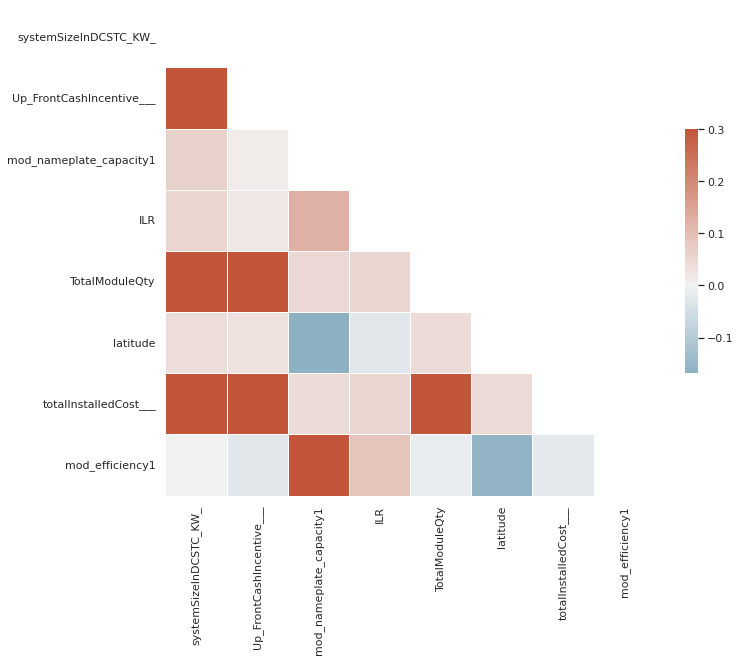

In [16]:
from string import ascii_letters

df1 = df[['totalInstalledCost___', 'systemSizeInDCSTC_KW_', 'Up_FrontCashIncentive___', 'azimuth_1', 'tilt_1', 'mod_BIPV1', 
        'mod_bifacial1', 'mod_nameplate_capacity1', 'mod_efficiency1', 'inverterQuantity_1', 
        'inv_microinv1', 'inv_battery_hybrid1', 'inv_builtin_meter1', 'inv_outputcapacity1', 
        'dc_optimizer', 'ILR', 'TotalModuleQty', 'latitude', 'longitude', 'cost_per_module']]
df1 = df1.dropna(subset=['latitude', 'longitude'])

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df_reg.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
X = df_reg[['systemSizeInDCSTC_KW_',  'mod_nameplate_capacity1',  'ILR', 'TotalModuleQty', 'latitude', 'mod_efficiency1']]
y = df_reg['totalInstalledCost___']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=9, shuffle = True)

In [18]:
estimator = DecisionTreeRegressor(max_depth=4)
clf_bag = BaggingRegressor(base_estimator=estimator, n_estimators=100, random_state=7)
clf_bag = clf_bag.fit(X_train, y_train)
y_predict = clf_bag.predict(X_test)
mse_bag = mean_squared_error(y_test, y_predict)
r2_bag = r2_score(y_test, y_predict)
print(mse_bag)
print(r2_bag)

12674272070.155067
0.8750589977406065


In [19]:
clf_RF = RandomForestRegressor(n_estimators = 100, max_depth = 5, max_features = 5, random_state = 7)
clf_RF = clf_RF.fit(X_train, y_train)
y_predict_RF = clf_RF.predict(X_test)
mse_RF = mean_squared_error(y_test, y_predict_RF)
r2_RF = r2_score(y_test, y_predict_RF)
print(mse_RF)
print(r2_RF)

12097255219.521217
0.8807471400843798


In [20]:
clf_GB = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=7)
clf_GB = clf_GB.fit(X_train, y_train)
y_predict = clf_GB.predict(X_test)
mse_GB = mean_squared_error(y_test, y_predict)
r2_GB = r2_score(y_test, y_predict)
print(mse_GB)
print(r2_GB)

15522777904.067566
0.8469788703880616


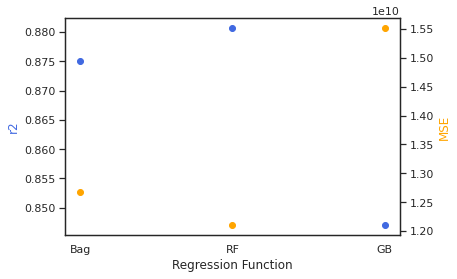

In [21]:
MSE = [mse_bag, mse_RF, mse_GB]
reg = ['Bag', 'RF', 'GB']
r2 = [r2_bag, r2_RF, r2_GB]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.scatter(reg, r2, color = 'royalblue', label = 'r2')
ax2.scatter(reg, MSE, color = 'orange', label = 'MSE')

ax1.set_xlabel('Regression Function')
ax1.set_ylabel('r2', color = 'royalblue')
ax2.set_ylabel('MSE', color = 'orange')

#ax1.legend()
#ax2.legend()
plt.show()

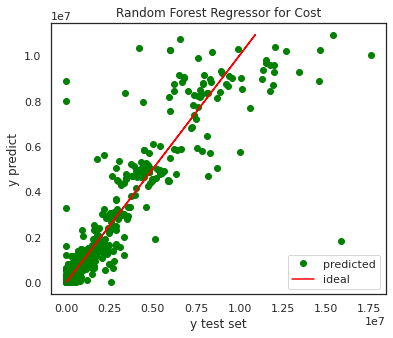

R2:  0.8807471400843798


In [22]:
plt.figure(figsize = (6,5))
plt.plot(y_test, y_predict_RF, 'o', color = 'green', label = 'predicted')
plt.plot(y_predict_RF, y_predict_RF, '-', color = 'red', label = 'ideal')

plt.title('Random Forest Regressor for Cost')
plt.xlabel('y test set')
plt.ylabel('y predict')
plt.legend()

plt.show()

print('R2: ', r2_RF)

## Multiple Linear Regression

In [23]:
lin_reg = linear_model.LinearRegression().fit(X_train, y_train)
beta1 = lin_reg.coef_
beta0 = lin_reg.intercept_
print('Slope: ', beta1, 'Intercept: ', beta0)

y_calc = lin_reg.predict(X_test)

Slope:  [-1.73532701e+03  2.91159942e+02 -2.51812491e+03  6.15138728e+02
  3.47006287e+02 -4.38079538e+05] Intercept:  -1418.6325880485383


In [24]:
numFeat = 7
reg = linear_model.LinearRegression()
reg.fit(X_train.iloc[:,0:numFeat],y_train)
print(X_train.iloc[:,0:numFeat].shape)
print(lin_reg.coef_)
print(lin_reg.intercept_)

y_predicted = reg.predict(X_test.iloc[:,0:numFeat])
y_predicted.shape
print(X_test.shape)

(321804, 6)
[-1.73532701e+03  2.91159942e+02 -2.51812491e+03  6.15138728e+02
  3.47006287e+02 -4.38079538e+05]
-1418.6325880485383
(85543, 6)


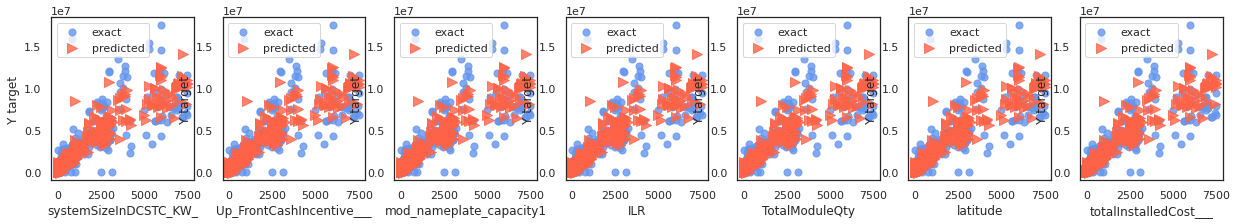

In [25]:
fig, ax = plt.subplots(1,numFeat, figsize = (numFeat*3,3))
names = df_reg.columns
for i in range(numFeat):
    ax[i].scatter(X_test.iloc[:,0], y_test, s = 50, marker = 'o', color = 'cornflowerblue', alpha = 0.8, label = 'exact')
    ax[i].scatter(X_test.iloc[:,0], y_predicted, s = 100, marker = '>', color = 'tomato', alpha = 0.8, label = 'predicted')
    ax[i].set_xlabel(names[i])
    ax[i].set_ylabel('Y target')
    ax[i].legend()

plt.show()

In [26]:
reg.score(X_test.iloc[:,0:numFeat], y_test)

0.8466777738326208

## California

df_cal = df[['systemSizeInDCSTC_KW_', 'Up_FrontCashIncentive___' , 'mod_nameplate_capacity1',  'ILR', 
        'TotalModuleQty', 'latitude', 'totalInstalledCost___', 'mod_efficiency1', 'state']]
df_cal = df_cal.where(df['systemSizeInDCSTC_KW_'] != -1).dropna()
df_cal = df_cal.where(df['mod_nameplate_capacity1'] != -1).dropna()
df_cal = df_cal.where(df['ILR'] != -1).dropna()
df_cal = df_cal.where(df['TotalModuleQty'] != -1).dropna()
df_cal = df_cal.where(df['latitude'] != -1).dropna()
df_cal = df_cal.where(df['mod_efficiency1'] != -1).dropna()
df_cal = df_cal.where(df['Up_FrontCashIncentive___'] != -1).dropna()

In [61]:
cal_data = data.loc[(data['state'] == 'CA')]

In [62]:
cal_data.head()

,Unnamed: 0,dataProvider1,dataProvider2,program1ProjectID,PTODate_orProxy_,systemSizeInDCSTC_KW_,totalInstalledCost___,Up_FrontCashIncentive___,customerSegment,is_expansion,...,inv_model1_clean,inverterQuantity_1,additionalInverterModels_Y_N_,inv_microinv1,inv_battery_hybrid1,inv_builtin_meter1,inv_outputcapacity1,dc_optimizer,ILR,TotalModuleQty
355563,355563,California Center for Sustainable Energy (Bear...,-1,BVSI-0041,9-Jul-14,7.000,17500.0,4294.0,RES,0,...,M250-60-2LL-S25-NA (240V),14.0,-1,1,0,0,0.240,0,-1.000000,27.0
355564,355564,California Center for Sustainable Energy (Bear...,-1,BVSI-0049,4-Feb-15,6.600,31000.0,5418.0,RES,0,...,M250-60-2LL-S25-NA (240V),24.0,-1,1,0,0,0.240,0,1.145833,47.0
355565,355565,California Center for Sustainable Energy (Bear...,-1,BVSI-0050,4-Feb-15,4.400,21000.0,5655.0,RES,0,...,M250-60-2LL-S25-NA (240V),16.0,-1,1,0,0,0.240,0,1.145833,31.0
355566,355566,California Center for Sustainable Energy (Bear...,-1,BVSI-0053,17-Sep-14,4.104,31360.0,2797.0,RES,0,...,SB3000TL-US-22 [240V],2.0,-1,0,-1,1,3.050,0,-1.000000,151.0
355567,355567,California Center for Sustainable Energy (Bear...,-1,BVSI-0056,13-Feb-14,4.500,20000.0,6216.0,RES,0,...,M215-60-2LL-S2x-NA [240V],18.0,-1,1,-1,0,0.215,0,1.162791,35.0


<AxesSubplot:>

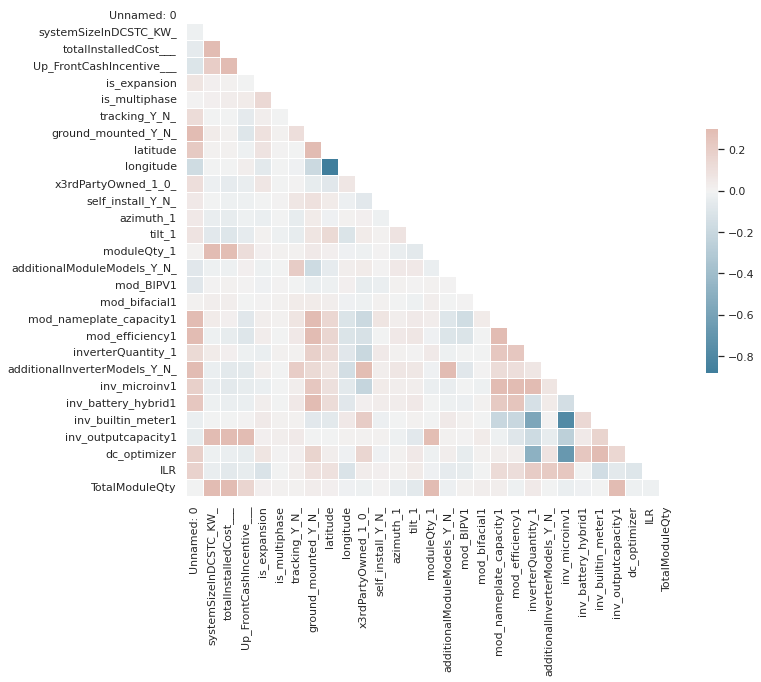

In [63]:
from string import ascii_letters

cal_data = cal_data.dropna(subset=['latitude', 'longitude'])

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = cal_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [47]:
X = cal_data[['systemSizeInDCSTC_KW_', 'Up_FrontCashIncentive___', 'azimuth_1', 'tilt_1', 
        'mod_nameplate_capacity1', 'inverterQuantity_1', 'inv_outputcapacity1', 
        'ILR', 'TotalModuleQty', 'latitude', 'longitude','mod_efficiency1']]

y = cal_data['totalInstalledCost___']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=9, shuffle = True)

In [48]:
names = 'systemSizeInDCSTC_KW_', 'Up_FrontCashIncentive___', 'azimuth_1', 'tilt_1', 'mod_nameplate_capacity1', 'inverterQuantity_1', 'inv_outputcapacity1', 'ILR', 'TotalModuleQty', 'latitude', 'longitude','mod_efficiency1'
f_names = np.array(names)

In [49]:
# Forward stepwise selection
sfs_forward = SequentialFeatureSelector(linear_model.LinearRegression(), 
                                        n_features_to_select=5, 
                                        direction = 'forward').fit(X,y)
print('support: ', sfs_forward.get_support(), "\n")
selected = sfs_forward.get_support(indices = True)
print(selected)
print('Selected input features using Forward Stepwise Selection: \n', f_names[selected])
fsc = f_names[selected]

support:  [ True  True False False False  True False  True False  True False False] 

[0 1 5 7 9]
Selected input features using Forward Stepwise Selection: 
 ['systemSizeInDCSTC_KW_' 'Up_FrontCashIncentive___' 'inverterQuantity_1'
 'ILR' 'latitude']


In [50]:
sfs_backward = SequentialFeatureSelector(linear_model.LinearRegression(), 
                                        n_features_to_select=5, 
                                        direction = 'backward').fit(X,y)

print('support: ', sfs_backward.get_support(), "\n")
selected = sfs_backward.get_support(indices = True)
print(selected)
print('Selected input features using Backward Stepwise Selection: \n', f_names[selected])
bsc = f_names[selected]

support:  [ True  True False False  True False False  True False False False  True] 

[ 0  1  4  7 11]
Selected input features using Backward Stepwise Selection: 
 ['systemSizeInDCSTC_KW_' 'Up_FrontCashIncentive___'
 'mod_nameplate_capacity1' 'ILR' 'mod_efficiency1']


In [51]:
def difference(list1, list2):
    return list(set(list1).symmetric_difference(set(list2)))

print(difference(fsc, bsc))

['mod_efficiency1', 'inverterQuantity_1', 'mod_nameplate_capacity1', 'latitude']


In [52]:
X = cal_data[['systemSizeInDCSTC_KW_',  'mod_nameplate_capacity1', 'inverterQuantity_1', 'ILR', 'TotalModuleQty', 'latitude', 'mod_efficiency1']]
y = cal_data['totalInstalledCost___']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=9, shuffle = True)

In [53]:
clf_RF = RandomForestRegressor(n_estimators = 100, max_depth = 5, max_features = 5, random_state = 7)
clf_RF = clf_RF.fit(X_train, y_train)
y_predict_RF = clf_RF.predict(X_test)
mse_RF = mean_squared_error(y_test, y_predict_RF)
r2_RF = r2_score(y_test, y_predict_RF)
print(mse_RF)
print(r2_RF)

3850455714.5207634
0.7435281659052326


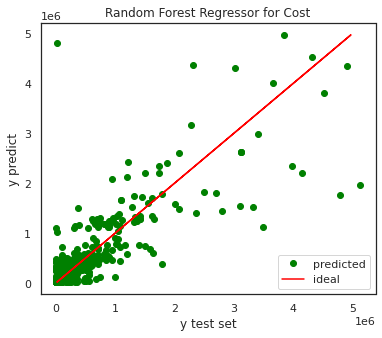

R2:  0.7435281659052326


In [56]:
plt.figure(figsize = (6,5))
plt.plot(y_test, y_predict_RF, 'o', color = 'green', label = 'predicted')
plt.plot(y_predict_RF, y_predict_RF, '-', color = 'red', label = 'ideal')

plt.title('Random Forest Regressor for Cost')
plt.xlabel('y test set')
plt.ylabel('y predict')
plt.legend()

plt.show()

print('R2: ', r2_RF)

# Various Plots

In [ ]:
plt.scatter(df['totalInstalledCost___'], df['Up_FrontCashIncentive___'])
plt.xlabel('total cost')
plt.ylabel('incentive')

In [ ]:
df3 = df.where(df['Up_FrontCashIncentive___'] != -1).dropna()
plt.scatter(df3['totalInstalledCost___'], df3['Up_FrontCashIncentive___'])
plt.xlabel('total cost')
plt.ylabel('incentive')

In [ ]:
plt.scatter(data['totalInstalledCost___'], data['moduleQty_1'])

In [ ]:
df3 = df.where(df['moduleQty_1'] != -1).dropna()

for i in range(len(df3)):
    if (df3['totalInstalledCost___'][i] != 0) and (df3['moduleQty_1'][i] != 0):
        plt.scatter(df3['totalInstalledCost___'][i], df3['moduleQty_1'][i], color = 'blue')
plt.xlabel('total cost')
plt.ylabel('quantity')